In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
topic_n = 25

lib = "./new_model/liberal_"+str(topic_n)+".model"
con = "./new_model/conserv_"+str(topic_n)+".model"

lib_model = LdaModel.load(lib)
con_model = LdaModel.load(con)

In [3]:
l = []
c = []

for t in range(topic_n):
    l_topic = lib_model.show_topic(t)
    c_topic = con_model.show_topic(t)
    for word,_ in l_topic:
        l.append(word)
    for word,_ in c_topic:
        c.append(word)
print(l)
print(c)

['republican', 'democrat', 'health', 'senat', 'vote', 'sander', 'obamacar', 'campaign', 'women', 'russia', 'est', 'women', 'russian', 'news', 'eu', 'pm', 'worker', 'ell', 'american', 'countri', 'assad', 'korea', 'syria', 'syrian', 'north', 'nuclear', 'rebel', 'regim', 'chemic', 'russia', 'emoji', 'israel', 'nieto', 'vaccin', 'film', 'wakefield', 'peña', 'isra', 'guzmán', 'reader', 'rahami', 'turkey', 'russian', 'turkish', 'senat', 'flynn', 'russia', 'erdogan', 'juno', 'faraday', 'republican', 'black', 'obama', 'sander', 'american', 'vote', 'tax', 'women', 'democrat', 'white', 'sponsor', 'updat', 'partner', 'receiv', 'superman', 'want', 'school', 'black', 'news', 'campaign', 'zenefit', 'corbyn', 'labour', 'naz', 'zimmerman', 'dorsey', 'school', 'vaccin', 'sack', 'rey', 'rousseff', 'game', 'marijuana', 'vote', 'women', 'mormon', 'film', 'walmart', 'pope', 'news', 'women', 'student', 'school', 'news', 'russian', 'percent', 'russia', 'rate', 'job', 'reef', 'court', 'abort', 'women', 'justi

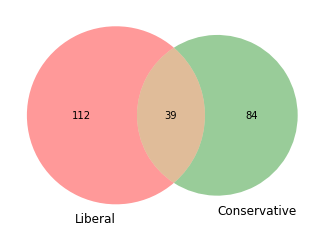

In [4]:
# Show Venn diagram
venn2([set(l), set(c)], set_labels = ('Liberal', 'Conservative'))
plt.show()

10 {'zenefit', 'samsung', 'rey', 'podcast', 'perski', 'marijuana', 'fox', 'ramsey', 'naz', 'peep', 'guzmán', 'flynn', 'music', 'salt', 'climat', 'want', 'updat', 'superman', 'diet', 'manchin', 'handmaid', 'ramsay', 'nuclear', 'sisi', 'corbyn', 'album', 'buffi', 'kill', 'ell', 'korean', 'eu', 'prokop', 'season', 'drug', 'shoot', 'metzger', 'dorsey', 'archiv', 'assad', 'simul', 'sanford', 'throne', 'justic', 'castro', 'bundi', 'case', 'murray', 'pm', 'north', 'food', 'rape', 'erdogan', 'sugar', 'alcohol', 'sack', 'chemic', 'reef', 'tax', 'peña', 'turkey', 'silva', 'puzder', 'order', 'convoy', 'isra', 'opioid', 'simpson', 'snapchat', 'nieto', 'job', 'eclips', 'rate', 'spacex', 'worker', 'levandowski', 'juno', 'korea', 'israel', 'kim', 'beyoncé', 'refuge', 'syrian', 'vaccin', 'sponsor', 'vr', 'emoji', 'car', 'govern', 'mormon', 'rebel', 'zimmerman', 'partner', 'chocol', 'luke', 'wakefield', 'elect', 'turkish', 'labour', 'est', 'walmart', 'daca', 'regim', 'pipelin', 'faraday', 'reader', 'ne

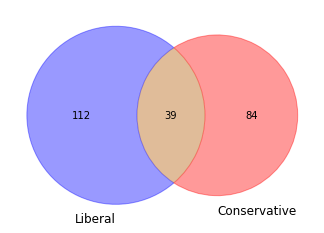

In [5]:
l = set(l)
c = set(c)
v = venn2([l,c], set_labels = ('Liberal', 'Conservative'))

fw = open("./output/result.txt", 'a', encoding='UTF8')
fw.write(str(topic_n)+' topics\n')

for id, data in zip(['10', '11', '01'], [l-c, l&c, c-l]):
    #num = v.get_label_by_id(id).get_text()
    #v.get_label_by_id(id).set_text(num+'\n\n' + '\n'.join(data))
    print(id, data)
    
    if id == '10': fw.write('Liberal only: ')
    elif id == '11': fw.write('Both: ')
    else: fw.write('Conservative only: ')
    for word in data:    
        fw.write(word+" ")
    fw.write("\n")
fw.write("\n")
fw.close()
    
v.get_patch_by_id('10').set_color('blue')
v.get_patch_by_id('01').set_color('red')

# %matplotlib inline
fig= plt.gcf()
plt.show()
fig.savefig("./output/"+str(topic_n)+'.png')